In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

In [2]:
def lorenz(xyz, beta, sigma, rho):
  x, y, z = xyz[:,0], xyz[:,1], xyz[:,2]

  dx = sigma*(y - x)
  dy = x*(rho - z) - y
  dz = x*y - beta*z

  return np.array([dx, dy, dz]).T

In [33]:
dt = 0.01
Nt = 10000
Ne = 10000
beta = 2.667
sigma = 10
rho = 28
eps = 0.5


x0 = np.random.randn(Ne, 3)

for t in tqdm(range(Nt)):
  nu = np.random.randn(Ne, 3)
  x0 = x0 + dt*lorenz(x0, beta, sigma, rho) + eps*np.sqrt(dt)*nu



100%|██████████| 10000/10000 [00:05<00:00, 1694.00it/s]


In [34]:
timeseries = np.random.randn(Ne, Nt, 3)
timeseries[:,0,:] = x0

delta = dt * 2

perturbed_timeseries = np.copy(timeseries)
perturbed_timeseries[:,0,1] += delta

In [35]:
for t in tqdm(range(1,Nt)):
  nu = np.random.randn(Ne, 3)
  perturbed_timeseries[:, t, :] = perturbed_timeseries[:, t-1, :] + dt*lorenz(perturbed_timeseries[:,t-1,:], beta, sigma, rho) + eps*np.sqrt(dt)*nu
  timeseries[:, t, :] = timeseries[:, t-1, :] + dt*lorenz(timeseries[:,t-1,:], beta, sigma, rho) + eps*np.sqrt(dt)*nu

response = np.mean(perturbed_timeseries - timeseries, axis=0) / delta

100%|██████████| 9999/9999 [00:27<00:00, 366.41it/s]


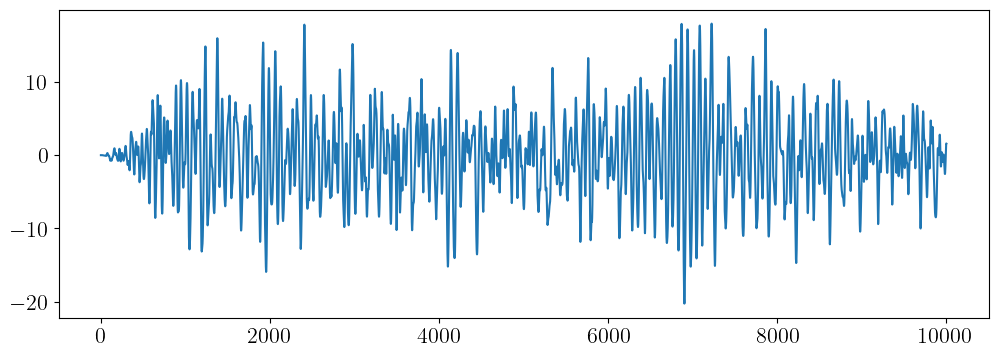

In [38]:
plt.plot(response[:,2])

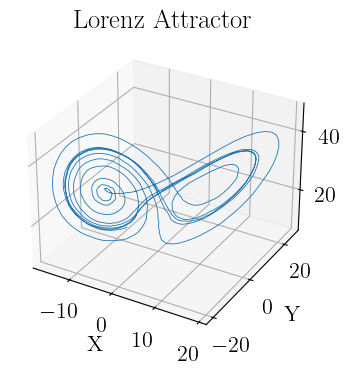

In [32]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*timeseries[0,:,:].T, lw=0.6)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")

plt.show()